In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


def get_data(path):

  df = pd.read_csv(path)

  df = df[['Open','High','Low','Close','Volume']].copy()

  # Fill NaN values using linear interpolation
  df.interpolate(method='linear', inplace=True)

  has_nan = df.isnull().values.any()

  if has_nan:
      print("DataFrame contains NaN values")
  else:
      print("DataFrame does not contain NaN values")


  print(df.head())
  df.describe()

  return df

In [2]:
df = pd.read_csv('Ahmedabad.csv')
df

,city,date,rate
0,Ahmedabad,2019-04-22,70.32
1,Ahmedabad,2019-04-22,70.32
2,Ahmedabad,2019-04-22,70.32
3,Ahmedabad,2019-04-22,70.32
4,Ahmedabad,2019-04-22,70.32
...,...,...,...
1019,Ahmedabad,2022-01-23,95.11
1020,Ahmedabad,2022-01-24,95.11
1021,Ahmedabad,2022-01-25,95.11
1022,Ahmedabad,2022-01-26,95.11


X_train shape: (4355, 5)
This is treated as a 1D array and not as a 2D array! Hence raises error in further steps. So we convert it to a 2D array by making each element a list itself



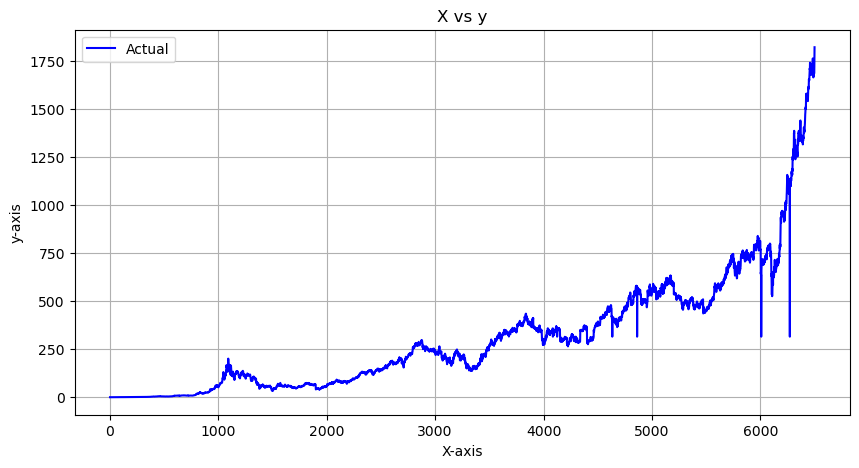

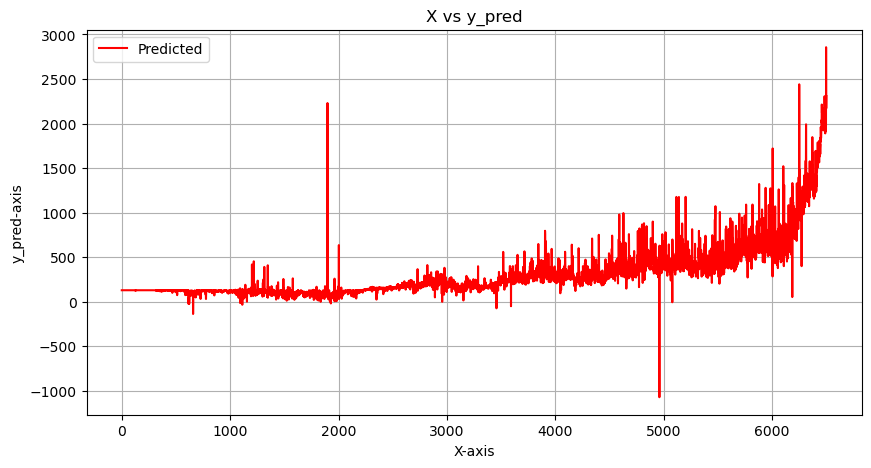

Mean Squared Error (MSE): 15249.550971374092
R-squared (R2): 0.8463184767273393
Mean Squared Error for train (MSE): 13109.365022044325
R-squared (R2) for train: 0.8704861428455388


In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('INFY.NS.csv')

# Drop 'Date' column
df = df.drop(columns=['Date'])

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
df[['Open', 'High', 'Low', 'Volume']] = imputer.fit_transform(df[['Open', 'High', 'Low', 'Volume']])
df[['Close', 'Adj Close']] = imputer.fit_transform(df[['Close', 'Adj Close']])

# Visualize Close Price over Index
# plt.figure(figsize=(10, 5))
# plt.plot(df.index, df['Close'], linestyle='-', color='b')
# plt.xlabel('Index')
# plt.ylabel('Close')
# plt.title('Close Price over Index')
# plt.grid(True)
# plt.show()

# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
numerical = ['Open', 'Close', 'Volume', 'High', 'Low']
# df[numerical] = scaler.fit_transform(df[numerical])

# Scatterplots for numerical features
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# numerical_features = ['Volume', 'Close', 'Open', 'High', 'Low']
# for i, feature in enumerate(numerical_features):
#     axs[i // 3, i % 3].scatter(df.index, df[feature])
#     axs[i // 3, i % 3].set_title(feature)
# plt.tight_layout()
# plt.show()

# Split the dataset into training and testing sets
y = df['Close']
X = df.drop(columns=['Close'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)


print("X_train shape:",X_train.shape)
print("This is treated as a 1D array and not as a 2D array! Hence raises error in further steps. So we convert it to a 2D array by making each element a list itself\n")
# X = np.array( [ [[j] for j in i] for i in X]  )
y = np.array( [ [i] for i in y ] )
# X_train=np.array( [ [[j] for j in i] for i in X_train] )
y_train=np.array([[i] for i in y_train])
# X_test=np.array([ [[j] for j in i] for i in X_test])
y_test=np.array([[i] for i in y_test])


import matplotlib.pyplot as plt

def visualise_fit(X,y,y_pred):

 # Plotting X vs y
 plt.figure(figsize=(10, 5))
 plt.plot(df.index.values, y, color='blue', label='Actual')
 plt.xlabel('X-axis')
 plt.ylabel('y-axis')
 plt.title('X vs y')
 plt.legend()
 plt.grid(True)
 plt.show()

 # Plotting X vs y_pred
 plt.figure(figsize=(10, 5))
 plt.plot(df.index.values, y_pred, color='red', label='Predicted')
 plt.xlabel('X-axis')
 plt.ylabel('y_pred-axis')
 plt.title('X vs y_pred')
 plt.legend()
 plt.grid(True)
 plt.show()

from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


def fit_model(model_name,X_train,y_train,X_test,y_test,deg):

#     model_name == 'Poly':
    poly = PolynomialFeatures(degree=deg)  # Degree of the polynomial features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

        # Fitting a linear regression model using polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train.reshape(-1,1 ))  # Reshape y to 2D array

        # Predicting on the test set
    y_pred = poly_model.predict(X_test_poly)
    y_pred1 = poly_model.predict(X_train_poly)

        # Evaluating the model (R-squared as an example metric)
    visualise_fit(X, y, poly_model.predict(poly.fit_transform(X)))

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    
    r3 = r2_score(y_train,y_pred1)
    mse1 = mean_squared_error(y_train,y_pred1)
    print(f"Mean Squared Error for train (MSE): {mse1}")
    print(f"R-squared (R2) for train: {r3}")

fit_model('Poly',X_train,y_train,X_test,y_test,3)

# for deg in range(1, 4):
#   fit_model('Poly',X_train, y_train, X_test, y_test, deg)

In [30]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Ahmedabad.csv')

# Convert 'date' to ordinal
date = df['date']

df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.toordinal())

# Drop missing values
df = df.dropna()

# Split the dataset into training and testing sets
y = df['rate']
X = df.drop(columns=['city','rate'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


227    2019-04-27
971    2021-12-06
497    2019-11-23
919    2021-10-12
177    2019-04-25
          ...    
106    2019-04-25
270    2019-04-27
860    2021-08-12
435    2019-08-06
102    2019-04-25
Name: date, Length: 716, dtype: object

Mean Squared Error (MSE) for test set: 5.7115066565545325
R-squared (R2) for test set: 0.9549542071194881
Mean Squared Error (MSE) for training set: 6.51923343926469
R-squared (R2) for training set: 0.9507011825117215


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.85854e-45): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


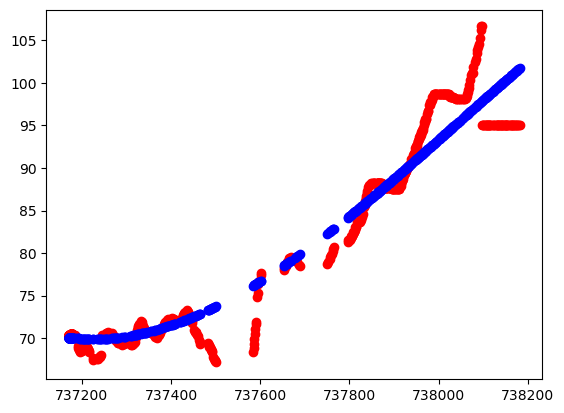

In [29]:
from sklearn.linear_model import Ridge

# Ridge Regression Model
def fit_model(X_train, y_train, X_test, y_test, deg, alpha):
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    y_pred = ridge_model.predict(X_test_poly)
    y_pred_train = ridge_model.predict(X_train_poly)

#     y_pred = regressor.predict(X_test)
#     y_pred_train = regressor.predict(X_train)

    # Evaluating the model
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f"Mean Squared Error (MSE) for test set: {mse_test}")
    print(f"R-squared (R2) for test set: {r2_test}")

    print(f"Mean Squared Error (MSE) for training set: {mse_train}")
    print(f"R-squared (R2) for training set: {r2_train}")

    # Visualize the fit
    # Import necessary libraries
    import matplotlib.pyplot as plt

    plt.scatter(X_train,y_train,color='red')
    plt.scatter(X_train,ridge_model.predict(X_train_poly),color='blue',label='Regression line')
#     ridge_model.predict(predi.reshape(-1,1))

# Example usage with degree 3 and alpha 0.1
fit_model(X_train, y_train, X_test, y_test, 4, 1)


In [31]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Ahmedabad.csv')

# Convert 'date' to ordinal
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.toordinal())

# Drop missing values
df = df.dropna()

# Split the dataset into training and testing sets
y = df['rate'].values
X = df.drop(columns=['city','rate']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred_train = regressor.predict(X_train.reshape(-1,1))

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (MSE) for test set: {mse_test}")
print(f"R-squared (R2) for test set: {r2_test}")

print(f"Mean Squared Error (MSE) for training set: {mse_train}")
print(f"R-squared (R2) for training set: {r2_train}")

Mean Squared Error (MSE) for test set: 11.684517946380213
R-squared (R2) for test set: 0.9078459665774457
Mean Squared Error (MSE) for training set: 12.401982379028283
R-squared (R2) for training set: 0.9062154973444974


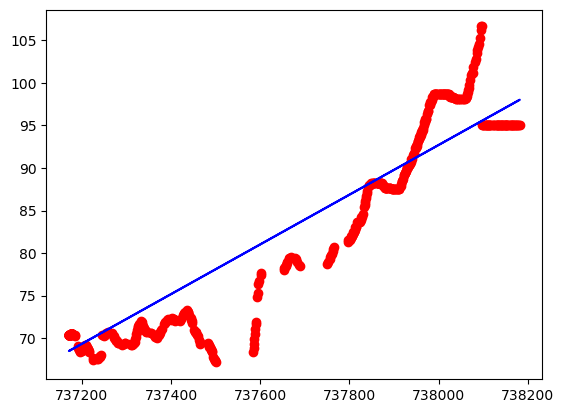

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train.reshape(-1,1)),color='blue',label='Regression line')

In [8]:
import matplotlib.pyplot as plt

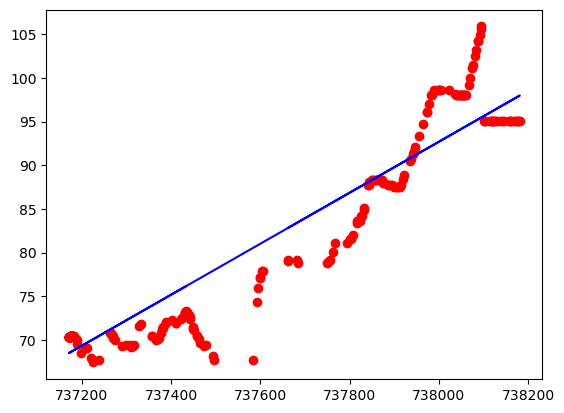

In [9]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,regressor.predict(X_test.reshape(-1,1)),color='blue',label='Regression line')

In [10]:
df = pd.read_csv('MaunaLoaDailyTemps.csv')
df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('MaunaLoaDailyTemps.csv')

# Convert 'date' to ordinal
df['DATE'] = pd.to_datetime(df['DATE']).apply(lambda x: x.toordinal())

# Drop missing values
df = df.dropna()

# Split the dataset into training and testing sets
y = df['AvgTemp'].values
X = df.drop(columns=['MinTemp','MaxTemp','AvgTemp','Sunrise','Sunset']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred_train = regressor.predict(X_train.reshape(-1,1))

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (MSE) for test set: {mse_test}")
print(f"R-squared (R2) for test set: {r2_test}")

print(f"Mean Squared Error (MSE) for training set: {mse_train}")
print(f"R-squared (R2) for training set: {r2_train}")


Mean Squared Error (MSE) for test set: 16.55874014608031
R-squared (R2) for test set: 0.00045915099085225286
Mean Squared Error (MSE) for training set: 17.40161579308368
R-squared (R2) for training set: 0.00046105266881857343


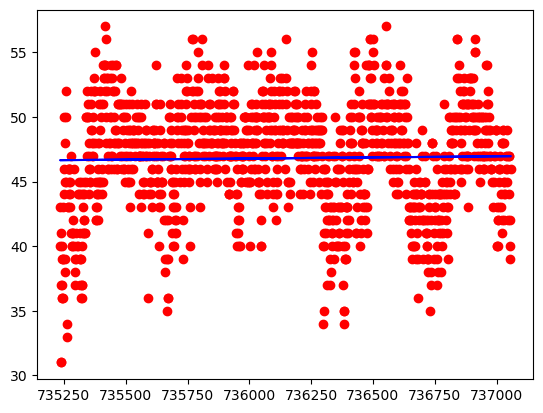

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train.reshape(-1,1)),color='blue',label='Regression line')

Mean Squared Error (MSE) for test set: 16.473283525376583
R-squared (R2) for test set: 0.0056175979776466045
Mean Squared Error (MSE) for training set: 16.08422154116251
R-squared (R2) for training set: 0.07613143175561554


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.30507e-57): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


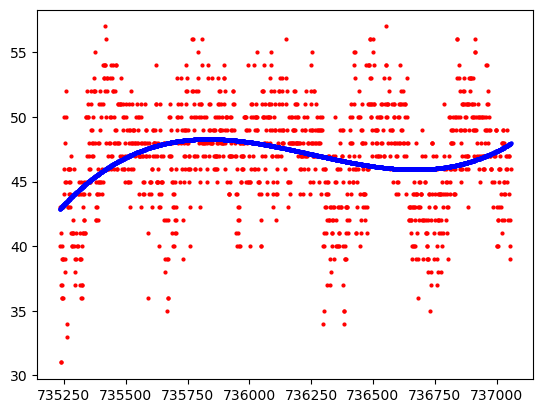

In [13]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('MaunaLoaDailyTemps.csv')

# Convert 'date' to ordinal
df['DATE'] = pd.to_datetime(df['DATE']).apply(lambda x: x.toordinal())

# Drop missing values
df = df.dropna()

# Split the dataset into training and testing sets
y = df['AvgTemp'].values
X = df.drop(columns=['MinTemp','MaxTemp','AvgTemp','Sunrise','Sunset']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X

from sklearn.linear_model import Ridge

# Ridge Regression Model
def fit_model(X_train, y_train, X_test, y_test, deg, alpha):
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    y_pred = ridge_model.predict(X_test_poly)
    y_pred_train = ridge_model.predict(X_train_poly)

#     y_pred = regressor.predict(X_test)
#     y_pred_train = regressor.predict(X_train)

    # Evaluating the model
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f"Mean Squared Error (MSE) for test set: {mse_test}")
    print(f"R-squared (R2) for test set: {r2_test}")

    print(f"Mean Squared Error (MSE) for training set: {mse_train}")
    print(f"R-squared (R2) for training set: {r2_train}")

    # Visualize the fit
    # Import necessary libraries
    import matplotlib.pyplot as plt

    plt.scatter(X_train,y_train,color='red',s = 4)
    plt.scatter(X_train,ridge_model.predict(X_train_poly),color='blue',label='Regression line',s = 5)
#     ridge_model.predict(predi.reshape(-1,1))

# Example usage with degree 3 and alpha 0.1
fit_model(X_train, y_train, X_test, y_test, 5, 1)

In [14]:
df = pd.read_csv('INFY.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0
...,...,...,...,...,...,...,...
6496,2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0
6497,2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0
6498,2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0
6499,2021-10-18,1740.000000,1799.000000,1740.000000,1792.150024,1792.150024,13438109.0


Mean Squared Error (MSE) for test set: 22915.411828899894
R-squared (R2) for test set: 0.7591273070261257
Mean Squared Error (MSE) for training set: 25332.693803305076
R-squared (R2) for training set: 0.7544374818276716


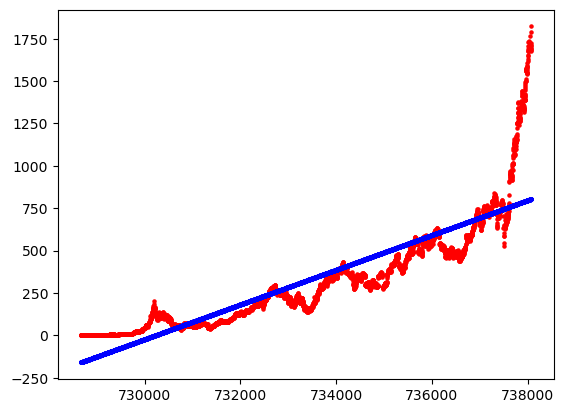

In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('INFY.NS.csv')

# Convert 'date' to ordinal
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.toordinal())

# Drop missing values
df = df.dropna()

# Split the dataset into training and testing sets
y = df['Close'].values
X = df.drop(columns=['Open','High','Low','Close','Adj Close','Volume']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred_train = regressor.predict(X_train.reshape(-1,1))

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (MSE) for test set: {mse_test}")
print(f"R-squared (R2) for test set: {r2_test}")

print(f"Mean Squared Error (MSE) for training set: {mse_train}")
print(f"R-squared (R2) for training set: {r2_train}")

# Import necessary libraries
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train,color='red',s = 5)
plt.scatter(X_train,regressor.predict(X_train.reshape(-1,1)),color='blue',label='Regression line',s = 5)


Mean Squared Error (MSE) for test set: 10356.376908506933
R-squared (R2) for test set: 0.8911401455915152
Mean Squared Error (MSE) for training set: 10421.592487536958
R-squared (R2) for training set: 0.8989782723276152


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.41824e-59): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


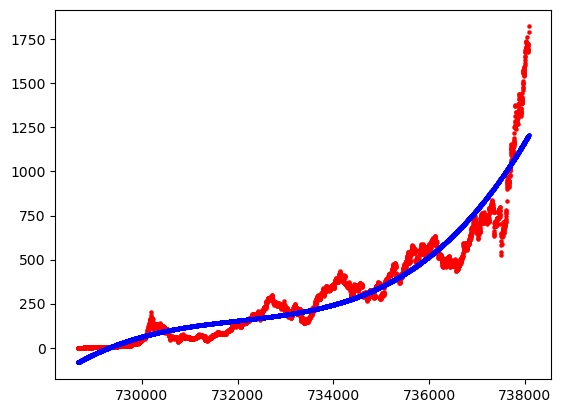

In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('INFY.NS.csv')

# Convert 'date' to ordinal
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.toordinal())

# Drop missing values
df = df.dropna()

# Split the dataset into training and testing sets
y = df['Close'].values
X = df.drop(columns=['Open','High','Low','Close','Adj Close','Volume']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X

from sklearn.linear_model import Ridge

# Ridge Regression Model
def fit_model(X_train, y_train, X_test, y_test, deg, alpha):
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    y_pred = ridge_model.predict(X_test_poly)
    y_pred_train = ridge_model.predict(X_train_poly)

#     y_pred = regressor.predict(X_test)
#     y_pred_train = regressor.predict(X_train)

    # Evaluating the model
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print(f"Mean Squared Error (MSE) for test set: {mse_test}")
    print(f"R-squared (R2) for test set: {r2_test}")

    print(f"Mean Squared Error (MSE) for training set: {mse_train}")
    print(f"R-squared (R2) for training set: {r2_train}")

    # Visualize the fit
    # Import necessary libraries
    import matplotlib.pyplot as plt

    plt.scatter(X_train,y_train,color='red',s = 5)
    plt.scatter(X_train,ridge_model.predict(X_train_poly),color='blue',label='Regression line',s = 5)
#     ridge_model.predict(predi.reshape(-1,1))

# Example usage with degree 3 and alpha 0.1
fit_model(X_train, y_train, X_test, y_test, 5, 1)